In [16]:
import imageio.v2 as imageio
import glob

import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib


In [2]:
# gets number of unique values in a numpy array along axis 0s
def diffcount(A):
    B=A.copy()
    B.sort(axis=0)
    C=np.diff(B,axis=0)>0
    D=C.sum(axis=0)+1
    return D

In [3]:
# load images

# display images

# combine with meta data

# combine image data ...

In [4]:
# max([i for i in range(1,6667)])

In [5]:
# try loading all files like this.. 
# if it's too big, can just structure the metadata and load files as needed...

wagdies_df = pd.DataFrame()

for wagdie in range(1,6667):
    png = imageio.imread(f'images/{wagdie}.png')
    metadata =pd.read_json(f'metadata/{wagdie}.json')
    
    # format and combine attributues
    attributes = dict()
    attributes['wagdie']=[wagdie] # index
    for a in metadata.attributes:
        attributes[a['trait_type']] = [a['value']]
    # save png as a column
    attributes['png']=[png]
    # format as a df
    df = pd.DataFrame.from_dict(attributes)
    # append to all dfs
    wagdies_df = wagdies_df.append(df)
    
    if wagdie%1000 == 0:
        print(wagdie)
    

1000
2000
3000
4000
5000
6000


In [6]:
wagdies_df=wagdies_df.set_index('wagdie')

Decrepit: Convert of the Swamp Witch


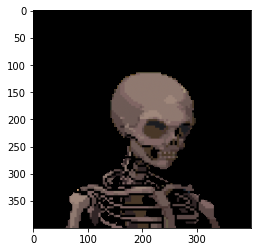

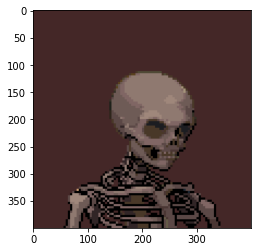

Decrepit: Her Painless Worshipper


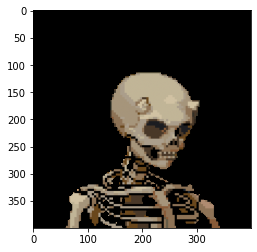

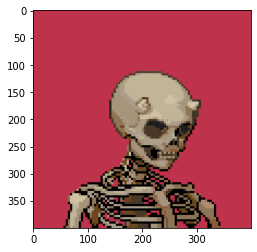

Decrepit: Swamp Witch Curse


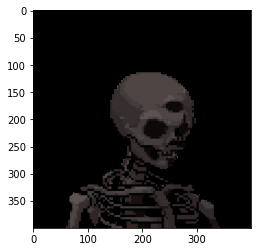

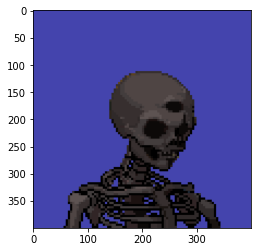

Decrepit: Her Fallen Worshipper


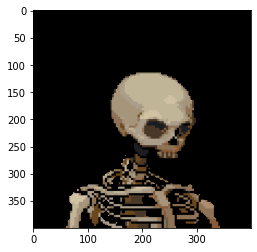

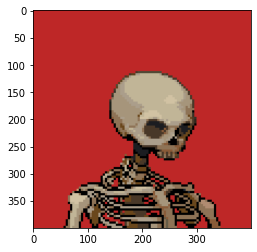

Decrepit: Swamp Witch Disciple


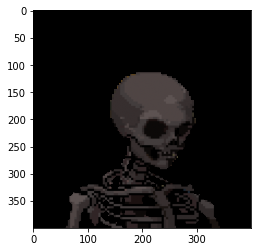

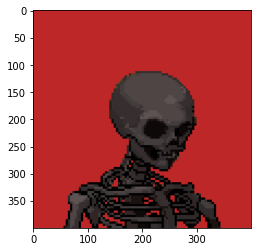

In [17]:
# eg getting all images with just one attribute;

dimensions = ['Decrepit'] #[c for c in wagdies_df.columns if c!='png']

# could also filter for where values on non-d dimension are NaN or None then just use mode

# number of unique values needed to mask a pixel
## TODO: would need to tune this for each dimension or maybe each feature...
thresholds = dict()
thresholds['Decrepit']=2

for d in dimensions:
    # gets features along this dimension
    features = [f for f in wagdies_df.loc[:,d].unique() if f!='None' and f is not np.nan]
    for f in features:
        print(f'{d}: {f}')
        # get the data
        ## TODO: might need to customize this for each feature too...
        if d == 'Decrepit':
            tmp=wagdies_df.loc[(wagdies_df.loc[:,d]==f) & (wagdies_df.loc[:,'Mask']=='None'),:] # where the dimension == the feature
        else:
            tmp=wagdies_df.loc[wagdies_df.loc[:,d]==f,:] # where the dimension == the feature

        tmp=tmp.reset_index()

        # combine all into a single array
        tmpa=np.stack(tmp.png)

        # get modal value
        tmp_mode=stats.mode(tmpa,axis=0).mode.reshape(400,400,4)
        # get number of unique values
        tmp_unique=diffcount(tmpa)

        # start with modal value
        tmp_extracted = tmp_mode.copy().astype(float)/255
        # cells that have > <threshold> unique values get replaced with nans
        threshold = thresholds[d]
        tmp_extracted[tmp_unique>=threshold]=np.nan
        
        # show extracted feature and the mode
        plt.imshow(tmp_extracted)
        plt.show()
        plt.imshow(tmp_mode)
        plt.show()
        
        # save image
        d_fn = d.replace(' ','_')
        f_fn = f.replace(' ','_')
        matplotlib.image.imsave(f'features/{d_fn}_{f_fn}.png', tmp_extracted)
        